In [2]:
!pip install wandb


  Obtaining dependency information for wandb from https://files.pythonhosted.org/packages/88/e4/2e6a7e925a44da70248130c763440d87f3fc28791964bb6c0c2b2cfbe55f/wandb-0.17.5-py3-none-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for docker-pycreds>=0.4.0 from https://files.pythonhosted.org/packages/f5/e8/f6bd1eee09314e7e6dee49cbe2c5e22314ccdb38db16c9fc72d2fa80d054/docker_pycreds-0.4.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for gitpython!=3.1.29,>=1.0.0 from https://files.pythonhosted.org/packages/e9/bd/cc3a402a6439c15c3d4294333e13042b915bbeab54edc457c723931fed3f/GitPython-3.1.43-py3-none-any.whl.metadata
  Obtaining dependency information for protobuf!=4.21.0,<6,>=3.19.0 from https://files.pythonhosted.org/packages/27/e4/8dc4546be46873f8950cb44cdfe19b79d66d26e53c4ee5e3440406257fcd/protobuf-5.27.2-cp38-abi3-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for sen

In [3]:
import wandb

# API 키를 직접 입력하여 로그인
wandb.login(key='29deffe9c585c7df9856b1bb0306cf3365f482dc')


Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /data/ephemeral/home/.netrc


True

In [7]:
!pip install pillow

In [15]:
import os
import time
import timm
import torch
import albumentations as A
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import ReduceLROnPlateau
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score



# 학습에 사용할 장치를 설정합니다.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터 설정
data_path = 'datasets_fin/'

# 모델 설정
model_name = 'vit_base_patch16_224'

# 학습 설정
img_size = 224  # ViT는 224x224 크기의 입력 이미지를 사용합니다.
LR = 1e-3
EPOCHS = 200
BATCH_SIZE = 128
num_workers = 16  # 일단 0으로 설정하여 멀티프로세싱 비활성화
early_stopping_patience = 5  # Early Stopping 설정

# wandb 프로젝트 초기화
wandb.init(
    project="competition2-cv",
    config={
        "learning_rate": LR,
        "architecture": model_name,
        "dataset": "custom-dataset",
        "epochs": EPOCHS,
        "batch_size": BATCH_SIZE,
        "image_size": img_size
    }
)

train_acc,▁▄▄▆▆▆▇▆▇██
train_f1,▁▄▄▆▆▆▇▆▇▇█
train_loss,█▅▄▃▃▃▂▃▃▁▁
train_acc,0.51924
train_f1,0.47764
train_loss,1.39294


In [10]:
torch.cuda.is_available()

True

Loss: 1.1113: 100%|██████████| 246/246 [03:33<00:00,  1.15it/s]


train_loss: 1.8933
train_acc: 0.3611
train_f1: 0.3307
epoch: 0.0000



Loss: 0.6132: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 1.0777
train_acc: 0.6246
train_f1: 0.5838
epoch: 1.0000



Loss: 0.6819: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.8103
train_acc: 0.7153
train_f1: 0.6831
epoch: 2.0000



Loss: 0.3508: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.7030
train_acc: 0.7471
train_f1: 0.7213
epoch: 3.0000



Loss: 0.6122: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.5893
train_acc: 0.7927
train_f1: 0.7722
epoch: 4.0000



Loss: 0.6445: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.5264
train_acc: 0.8140
train_f1: 0.7968
epoch: 5.0000



Loss: 0.2836: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.5028
train_acc: 0.8228
train_f1: 0.8059
epoch: 6.0000



Loss: 0.3911: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.4498
train_acc: 0.8425
train_f1: 0.8297
epoch: 7.0000



Loss: 0.4422: 100%|██████████| 246/246 [03:32<00:00,  1.15it/s]


train_loss: 0.4891
train_acc: 0.8291
train_f1: 0.8171
epoch: 8.0000



Loss: 0.3611: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.4975
train_acc: 0.8271
train_f1: 0.8129
epoch: 9.0000



Loss: 0.3497: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.4251
train_acc: 0.8494
train_f1: 0.8389
epoch: 10.0000



Loss: 0.0998: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.3211
train_acc: 0.8874
train_f1: 0.8795
epoch: 11.0000



Loss: 0.3315: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.4092
train_acc: 0.8576
train_f1: 0.8469
epoch: 12.0000



Loss: 0.3064: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.3690
train_acc: 0.8721
train_f1: 0.8635
epoch: 13.0000



Loss: 0.2374: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.2611
train_acc: 0.9091
train_f1: 0.9026
epoch: 14.0000



Loss: 0.4193: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.2783
train_acc: 0.9051
train_f1: 0.8998
epoch: 15.0000



Loss: 0.2107: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.2906
train_acc: 0.9018
train_f1: 0.8958
epoch: 16.0000



Loss: 0.1525: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.2102
train_acc: 0.9279
train_f1: 0.9232
epoch: 17.0000



Loss: 0.5655: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.2473
train_acc: 0.9167
train_f1: 0.9119
epoch: 18.0000



Loss: 0.3580: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.2855
train_acc: 0.9046
train_f1: 0.8982
epoch: 19.0000



Loss: 0.2720: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.2788
train_acc: 0.9067
train_f1: 0.9007
epoch: 20.0000



Loss: 0.4936: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.2692
train_acc: 0.9106
train_f1: 0.9049
epoch: 21.0000

Epoch 00022: reducing learning rate of group 0 to 1.0000e-04.


Loss: 0.0131: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0931
train_acc: 0.9698
train_f1: 0.9685
epoch: 22.0000



Loss: 0.1205: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0368
train_acc: 0.9893
train_f1: 0.9888
epoch: 23.0000



Loss: 0.0119: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0234
train_acc: 0.9940
train_f1: 0.9937
epoch: 24.0000



Loss: 0.0433: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0169
train_acc: 0.9951
train_f1: 0.9949
epoch: 25.0000



Loss: 0.0004: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.0153
train_acc: 0.9958
train_f1: 0.9957
epoch: 26.0000



Loss: 0.0039: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0120
train_acc: 0.9964
train_f1: 0.9963
epoch: 27.0000



Loss: 0.0086: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0118
train_acc: 0.9966
train_f1: 0.9964
epoch: 28.0000



Loss: 0.0017: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0088
train_acc: 0.9973
train_f1: 0.9972
epoch: 29.0000



Loss: 0.0025: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0136
train_acc: 0.9958
train_f1: 0.9956
epoch: 30.0000



Loss: 0.0028: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0091
train_acc: 0.9972
train_f1: 0.9971
epoch: 31.0000



Loss: 0.0093: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0078
train_acc: 0.9975
train_f1: 0.9975
epoch: 32.0000



Loss: 0.0322: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0121
train_acc: 0.9965
train_f1: 0.9964
epoch: 33.0000



Loss: 0.0297: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0061
train_acc: 0.9983
train_f1: 0.9982
epoch: 34.0000



Loss: 0.0001: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0068
train_acc: 0.9982
train_f1: 0.9980
epoch: 35.0000



Loss: 0.0048: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0071
train_acc: 0.9980
train_f1: 0.9979
epoch: 36.0000



Loss: 0.0005: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0069
train_acc: 0.9981
train_f1: 0.9980
epoch: 37.0000



Loss: 0.0002: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.0045
train_acc: 0.9987
train_f1: 0.9986
epoch: 38.0000



Loss: 0.0109: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0109
train_acc: 0.9963
train_f1: 0.9961
epoch: 39.0000



Loss: 0.0013: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0101
train_acc: 0.9968
train_f1: 0.9965
epoch: 40.0000



Loss: 0.0068: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0071
train_acc: 0.9980
train_f1: 0.9979
epoch: 41.0000



Loss: 0.0007: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0051
train_acc: 0.9984
train_f1: 0.9984
epoch: 42.0000

Epoch 00043: reducing learning rate of group 0 to 1.0000e-05.


Loss: 0.0141: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0041
train_acc: 0.9987
train_f1: 0.9986
epoch: 43.0000



Loss: 0.0001: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0044
train_acc: 0.9990
train_f1: 0.9990
epoch: 44.0000



Loss: 0.0003: 100%|██████████| 246/246 [03:32<00:00,  1.16it/s]


train_loss: 0.0029
train_acc: 0.9992
train_f1: 0.9991
epoch: 45.0000



Loss: 0.0033: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0024
train_acc: 0.9994
train_f1: 0.9993
epoch: 46.0000



Loss: 0.0004: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0025
train_acc: 0.9993
train_f1: 0.9992
epoch: 47.0000



Loss: 0.0001: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0027
train_acc: 0.9992
train_f1: 0.9992
epoch: 48.0000



Loss: 0.0003: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0023
train_acc: 0.9993
train_f1: 0.9993
epoch: 49.0000



Loss: 0.0003: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0019
train_acc: 0.9995
train_f1: 0.9995
epoch: 50.0000



Loss: 0.0003: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0023
train_acc: 0.9993
train_f1: 0.9993
epoch: 51.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0016
train_acc: 0.9997
train_f1: 0.9997
epoch: 52.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0020
train_acc: 0.9994
train_f1: 0.9994
epoch: 53.0000



Loss: 0.0001: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0017
train_acc: 0.9995
train_f1: 0.9995
epoch: 54.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0015
train_acc: 0.9996
train_f1: 0.9996
epoch: 55.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0013
train_acc: 0.9995
train_f1: 0.9995
epoch: 56.0000



Loss: 0.0001: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0012
train_acc: 0.9996
train_f1: 0.9996
epoch: 57.0000



Loss: 0.0002: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0021
train_acc: 0.9994
train_f1: 0.9994
epoch: 58.0000



Loss: 0.0038: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0016
train_acc: 0.9996
train_f1: 0.9996
epoch: 59.0000



Loss: 0.0002: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0020
train_acc: 0.9993
train_f1: 0.9994
epoch: 60.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0015
train_acc: 0.9996
train_f1: 0.9997
epoch: 61.0000

Epoch 00062: reducing learning rate of group 0 to 1.0000e-06.


Loss: 0.0002: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0018
train_acc: 0.9994
train_f1: 0.9994
epoch: 62.0000



Loss: 0.0004: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0014
train_acc: 0.9996
train_f1: 0.9996
epoch: 63.0000



Loss: 0.0002: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0010
train_acc: 0.9996
train_f1: 0.9996
epoch: 64.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0012
train_acc: 0.9997
train_f1: 0.9997
epoch: 65.0000



Loss: 0.0010: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0011
train_acc: 0.9997
train_f1: 0.9997
epoch: 66.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0011
train_acc: 0.9997
train_f1: 0.9997
epoch: 67.0000



Loss: 0.0035: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0013
train_acc: 0.9996
train_f1: 0.9996
epoch: 68.0000

Epoch 00069: reducing learning rate of group 0 to 1.0000e-07.


Loss: 0.0001: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0010
train_acc: 0.9998
train_f1: 0.9997
epoch: 69.0000



Loss: 0.0022: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0012
train_acc: 0.9997
train_f1: 0.9997
epoch: 70.0000



Loss: 0.0248: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0017
train_acc: 0.9994
train_f1: 0.9993
epoch: 71.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0011
train_acc: 0.9998
train_f1: 0.9998
epoch: 72.0000

Epoch 00073: reducing learning rate of group 0 to 1.0000e-08.


Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0013
train_acc: 0.9996
train_f1: 0.9996
epoch: 73.0000



Loss: 0.0000: 100%|██████████| 246/246 [03:31<00:00,  1.16it/s]


train_loss: 0.0012
train_acc: 0.9998
train_f1: 0.9998
epoch: 74.0000

Early stopping triggered after 75 epochs.


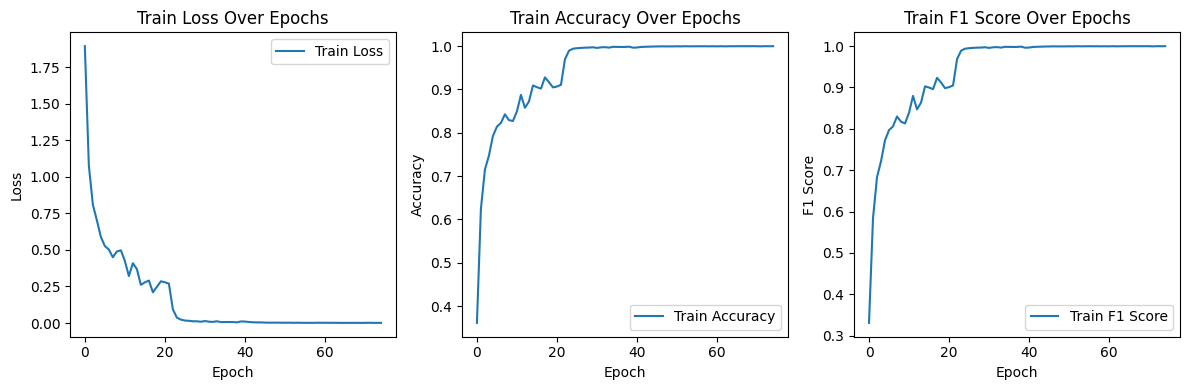

100%|██████████| 25/25 [00:08<00:00,  2.97it/s]


                     ID  target
0  0008fdb22ddce0ce.jpg       2
1  00091bffdffd83de.jpg      12
2  00396fbc1f6cc21d.jpg       5
3  00471f8038d9c4b6.jpg       4
4  00901f504008d884.jpg       2


train_acc,▁▄▅▆▆▆▇▇▇▇▇▇████████████████████████████
train_f1,▁▄▅▆▆▆▇▇▇▇▇▇████████████████████████████
train_loss,█▅▄▃▃▃▂▂▂▂▂▂▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁
train_acc,0.99978
train_f1,0.99978
train_loss,0.00115


In [16]:

# 데이터 변환 설정
trn_transform = A.Compose([
    A.Resize(height=img_size, width=img_size),
    A.OneOf([
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), p=0.5)
    ], p=0.5),
    A.RandomRotate90(p=0.5),
    A.Flip(p=0.5),
    A.RandomBrightnessContrast(p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

tst_transform = A.Compose([
    A.Resize(height=img_size, width=img_size),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

# Dataset 정의
class ImageDataset(Dataset):
    def __init__(self, csv, path, transform=None, augment_ratio=4):
        self.df = pd.read_csv(csv).values
        self.path = path
        self.transform = transform
        self.augment_ratio = augment_ratio

    def __len__(self):
        return len(self.df) * self.augment_ratio

    def __getitem__(self, idx):
        idx = idx % len(self.df)
        name, target = self.df[idx]
        img_path = os.path.join(self.path, name)
        
        try:
            img = np.array(Image.open(img_path))
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None
        
        if self.transform:
            img = self.transform(image=img)['image']
        return img, target

# 데이터셋 및 데이터 로더 정의
trn_dataset = ImageDataset(
    "datasets_fin/train.csv",
    "datasets_fin/train/",
    transform=trn_transform,
    augment_ratio=20
)

tst_dataset = ImageDataset(
    "datasets_fin/sample_submission.csv",
    "datasets_fin/test/",
    transform=tst_transform,
    augment_ratio=1
)

# 무결성 검사
def check_dataset_integrity(dataset):
    for idx in range(len(dataset)):
        img, target = dataset[idx]
        if img is None:
            print(f"Found broken image at index {idx}")
            return False
    return True

if not check_dataset_integrity(trn_dataset):
    print("Training dataset has issues")
if not check_dataset_integrity(tst_dataset):
    print("Test dataset has issues")

trn_loader = DataLoader(
    trn_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True,
    drop_last=False
)

tst_loader = DataLoader(
    tst_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True
)

# 모델을 불러옵니다.
model = timm.create_model(
    model_name,
    pretrained=True,
    num_classes=17,
    drop_rate=0.2  # Dropout 설정
).to(device)

# 손실 함수를 정의합니다.
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저를 정의합니다.
optimizer = Adam(model.parameters(), lr=LR)

# Learning Rate Scheduler를 정의합니다.
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Early Stopping을 위한 변수 초기화
best_loss = float('inf')
early_stopping_counter = 0

# 한 에폭(epoch) 동안 모델을 학습시키는 함수입니다.
def train_one_epoch(loader, model, optimizer, loss_fn, device):
    model.train()
    train_loss = 0
    preds_list = []
    targets_list = []

    pbar = tqdm(loader)
    for image, targets in pbar:
        if image is None or targets is None:
            continue
        
        image = image.to(device)
        targets = targets.to(device)

        optimizer.zero_grad(set_to_none=True)

        preds = model(image)
        loss = loss_fn(preds, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds_list.extend(preds.argmax(dim=1).detach().cpu().numpy())
        targets_list.extend(targets.detach().cpu().numpy())

        pbar.set_description(f"Loss: {loss.item():.4f}")

    train_loss /= len(loader)
    train_acc = accuracy_score(targets_list, preds_list)
    train_f1 = f1_score(targets_list, preds_list, average='macro')

    ret = {
        "train_loss": train_loss,
        "train_acc": train_acc,
        "train_f1": train_f1,
    }

    # wandb에 학습 과정 로그
    wandb.log({"train_loss": train_loss, "train_acc": train_acc, "train_f1": train_f1})

    return ret

# 학습 과정을 저장할 리스트 초기화
train_losses = []
train_accuracies = []
train_f1_scores = []

# 모델 학습 루프
for epoch in range(EPOCHS):
    ret = train_one_epoch(trn_loader, model, optimizer, loss_fn, device=device)
    ret['epoch'] = epoch

    # 학습 결과를 저장
    train_losses.append(ret["train_loss"])
    train_accuracies.append(ret["train_acc"])
    train_f1_scores.append(ret["train_f1"])

    log = ""
    for k, v in ret.items():
        log += f"{k}: {v:.4f}\n"
    print(log)

    # Scheduler 업데이트
    scheduler.step(ret["train_loss"])

    # Early Stopping 체크
    if ret["train_loss"] < best_loss:
        best_loss = ret["train_loss"]
        early_stopping_counter = 0
        # 모델 체크포인트 저장
        torch.save(model.state_dict(), "best_model.pth")
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

# 학습 손실 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()

# 학습 정확도 시각화
plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies)), train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy Over Epochs')
plt.legend()

# 학습 F1 점수 시각화
plt.subplot(1, 3, 3)
plt.plot(range(len(train_f1_scores)), train_f1_scores, label='Train F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Train F1 Score Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# 테스트 데이터에 대한 예측 수행
preds_list = []

model.eval()
for image, _ in tqdm(tst_loader):
    image = image.to(device)
    with torch.no_grad():
        preds = model(image)
    preds_list.extend(preds.argmax(dim=1).detach().cpu().numpy())

# 예측 결과를 데이터프레임으로 저장
pred_df = pd.DataFrame(tst_dataset.df, columns=['ID', 'target'])
pred_df['target'] = preds_list

# 제출 형식 파일을 읽어와 ID 열이 일치하는지 확인
sample_submission_df = pd.read_csv("datasets_fin/sample_submission.csv")
assert (sample_submission_df['ID'] == pred_df['ID']).all()

# 예측 결과를 CSV 파일로 저장
pred_df.to_csv("pred.csv", index=False)
print(pred_df.head())

# wandb 실행 종료
wandb.finish()


In [17]:
import os
import time
import timm
import torch
import albumentations as A
import pandas as pd
import numpy as np
import torch.nn as nn
import matplotlib.pyplot as plt
from albumentations.pytorch import ToTensorV2
from torch.optim import Adam
from torch.utils.data import Dataset, DataLoader
from torchvision.datasets import ImageFolder
from torch.optim.lr_scheduler import ReduceLROnPlateau
from PIL import Image
from tqdm import tqdm
from sklearn.metrics import accuracy_score, f1_score



# 학습에 사용할 장치를 설정합니다.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 데이터 설정
data_path = 'datasets_fin/'

# 모델 설정
model_name = 'vit_base_patch16_224'

# 학습 설정
img_size = 224  # ViT는 224x224 크기의 입력 이미지를 사용합니다.
LR = 1e-3
EPOCHS = 100
BATCH_SIZE = 128
num_workers = 16  # 일단 0으로 설정하여 멀티프로세싱 비활성화
early_stopping_patience = 5  # Early Stopping 설정

# wandb 프로젝트 초기화
wandb.init(
    project="competition2-cv",
    config={
        "learning_rate": LR,
        "architecture": model_name,
        "dataset": "custom-dataset",
        "epochs": EPOCHS,
        "batch_size": BATCH_SIZE,
        "image_size": img_size
    }
)

In [18]:

# 데이터 변환 설정
trn_transform = A.Compose([
    A.Resize(height=img_size, width=img_size),
    A.OneOf([
        A.GaussNoise(var_limit=(10.0, 50.0), p=0.5),
        A.GaussianBlur(blur_limit=(3, 7), p=0.5)
    ], p=0.5),
    A.Rotate(limit=30, p=0.5),
    A.RandomRotate90(p=0.25),
    A.Flip(p=0.25),
    A.RandomBrightnessContrast(p=0.5),
    A.HueSaturationValue(hue_shift_limit=20, sat_shift_limit=30, val_shift_limit=20, p=0.5),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    A.CoarseDropout(max_holes=8, max_height=8, max_width=8, p=0.5),
    ToTensorV2(),
])

tst_transform = A.Compose([
    A.Resize(height=img_size, width=img_size),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

# Dataset 정의
class ImageDataset(Dataset):
    def __init__(self, csv, path, transform=None, augment_ratio=4):
        self.df = pd.read_csv(csv).values
        self.path = path
        self.transform = transform
        self.augment_ratio = augment_ratio

    def __len__(self):
        return len(self.df) * self.augment_ratio

    def __getitem__(self, idx):
        idx = idx % len(self.df)
        name, target = self.df[idx]
        img_path = os.path.join(self.path, name)
        
        try:
            img = np.array(Image.open(img_path))
        except Exception as e:
            print(f"Error loading image {img_path}: {e}")
            return None, None
        
        if self.transform:
            img = self.transform(image=img)['image']
        return img, target

# 데이터셋 및 데이터 로더 정의
trn_dataset = ImageDataset(
    "datasets_fin/train.csv",
    "datasets_fin/train/",
    transform=trn_transform,
    augment_ratio=60
)

tst_dataset = ImageDataset(
    "datasets_fin/sample_submission.csv",
    "datasets_fin/test/",
    transform=tst_transform,
    augment_ratio=1
)

# 무결성 검사
def check_dataset_integrity(dataset):
    for idx in range(len(dataset)):
        img, target = dataset[idx]
        if img is None:
            print(f"Found broken image at index {idx}")
            return False
    return True

if not check_dataset_integrity(trn_dataset):
    print("Training dataset has issues")
if not check_dataset_integrity(tst_dataset):
    print("Test dataset has issues")

trn_loader = DataLoader(
    trn_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=num_workers,
    pin_memory=True,
    drop_last=False
)

tst_loader = DataLoader(
    tst_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=num_workers,
    pin_memory=True
)

# 모델을 불러옵니다.
model = timm.create_model(
    model_name,
    pretrained=True,
    num_classes=17,
    drop_rate=0.2  # Dropout 설정
).to(device)

# 손실 함수를 정의합니다.
loss_fn = nn.CrossEntropyLoss()

# 옵티마이저를 정의합니다.
optimizer = Adam(model.parameters(), lr=LR)

# Learning Rate Scheduler를 정의합니다.
scheduler = ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

# Early Stopping을 위한 변수 초기화
best_loss = float('inf')
early_stopping_counter = 0

# 한 에폭(epoch) 동안 모델을 학습시키는 함수입니다.
def train_one_epoch(loader, model, optimizer, loss_fn, device):
    model.train()
    train_loss = 0
    preds_list = []
    targets_list = []

    pbar = tqdm(loader)
    for image, targets in pbar:
        if image is None or targets is None:
            continue
        
        image = image.to(device)
        targets = targets.to(device)

        optimizer.zero_grad(set_to_none=True)

        preds = model(image)
        loss = loss_fn(preds, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        preds_list.extend(preds.argmax(dim=1).detach().cpu().numpy())
        targets_list.extend(targets.detach().cpu().numpy())

        pbar.set_description(f"Loss: {loss.item():.4f}")

    train_loss /= len(loader)
    train_acc = accuracy_score(targets_list, preds_list)
    train_f1 = f1_score(targets_list, preds_list, average='macro')

    ret = {
        "train_loss": train_loss,
        "train_acc": train_acc,
        "train_f1": train_f1,
    }

    # wandb에 학습 과정 로그
    wandb.log({"train_loss": train_loss, "train_acc": train_acc, "train_f1": train_f1})

    return ret

# 학습 과정을 저장할 리스트 초기화
train_losses = []
train_accuracies = []
train_f1_scores = []

# 모델 학습 루프
for epoch in range(EPOCHS):
    ret = train_one_epoch(trn_loader, model, optimizer, loss_fn, device=device)
    ret['epoch'] = epoch

    # 학습 결과를 저장
    train_losses.append(ret["train_loss"])
    train_accuracies.append(ret["train_acc"])
    train_f1_scores.append(ret["train_f1"])

    log = ""
    for k, v in ret.items():
        log += f"{k}: {v:.4f}\n"
    print(log)

    # Scheduler 업데이트
    scheduler.step(ret["train_loss"])

    # Early Stopping 체크
    if ret["train_loss"] < best_loss:
        best_loss = ret["train_loss"]
        early_stopping_counter = 0
        # 모델 체크포인트 저장
        torch.save(model.state_dict(), "best_model2.pth")
    else:
        early_stopping_counter += 1
        if early_stopping_counter >= early_stopping_patience:
            print(f"Early stopping triggered after {epoch+1} epochs.")
            break

# 학습 손실 시각화
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.plot(range(len(train_losses)), train_losses, label='Train Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Train Loss Over Epochs')
plt.legend()

# 학습 정확도 시각화
plt.subplot(1, 3, 2)
plt.plot(range(len(train_accuracies)), train_accuracies, label='Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Train Accuracy Over Epochs')
plt.legend()

# 학습 F1 점수 시각화
plt.subplot(1, 3, 3)
plt.plot(range(len(train_f1_scores)), train_f1_scores, label='Train F1 Score')
plt.xlabel('Epoch')
plt.ylabel('F1 Score')
plt.title('Train F1 Score Over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

# 테스트 데이터에 대한 예측 수행
preds_list = []

model.eval()
for image, _ in tqdm(tst_loader):
    image = image.to(device)
    with torch.no_grad():
        preds = model(image)
    preds_list.extend(preds.argmax(dim=1).detach().cpu().numpy())

# 예측 결과를 데이터프레임으로 저장
pred_df = pd.DataFrame(tst_dataset.df, columns=['ID', 'target'])
pred_df['target'] = preds_list

# 제출 형식 파일을 읽어와 ID 열이 일치하는지 확인
sample_submission_df = pd.read_csv("datasets_fin/sample_submission.csv")
assert (sample_submission_df['ID'] == pred_df['ID']).all()

# 예측 결과를 CSV 파일로 저장
pred_df.to_csv("pred2.csv", index=False)
print(pred_df.head())

# wandb 실행 종료
wandb.finish()


Loss: 0.7567: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 1.2948
train_acc: 0.5535
train_f1: 0.5189
epoch: 0.0000



Loss: 0.7043: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.7034
train_acc: 0.7479
train_f1: 0.7222
epoch: 1.0000



Loss: 0.3158: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.5267
train_acc: 0.8094
train_f1: 0.7917
epoch: 2.0000



Loss: 0.3889: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.3831
train_acc: 0.8614
train_f1: 0.8482
epoch: 3.0000



Loss: 0.1878: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.2972
train_acc: 0.8932
train_f1: 0.8834
epoch: 4.0000



Loss: 0.2110: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.2304
train_acc: 0.9186
train_f1: 0.9116
epoch: 5.0000



Loss: 0.3012: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.1718
train_acc: 0.9394
train_f1: 0.9338
epoch: 6.0000



Loss: 0.1470: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.1441
train_acc: 0.9506
train_f1: 0.9464
epoch: 7.0000



Loss: 0.0790: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.1239
train_acc: 0.9574
train_f1: 0.9538
epoch: 8.0000



Loss: 0.0758: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.1035
train_acc: 0.9639
train_f1: 0.9610
epoch: 9.0000



Loss: 0.1175: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0927
train_acc: 0.9687
train_f1: 0.9661
epoch: 10.0000



Loss: 0.0366: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0760
train_acc: 0.9739
train_f1: 0.9715
epoch: 11.0000



Loss: 0.0105: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.0734
train_acc: 0.9749
train_f1: 0.9727
epoch: 12.0000



Loss: 0.0186: 100%|██████████| 736/736 [10:34<00:00,  1.16it/s]


train_loss: 0.0633
train_acc: 0.9782
train_f1: 0.9767
epoch: 13.0000



Loss: 0.0070: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0541
train_acc: 0.9821
train_f1: 0.9805
epoch: 14.0000



Loss: 0.0226: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0501
train_acc: 0.9833
train_f1: 0.9820
epoch: 15.0000



Loss: 0.0210: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0483
train_acc: 0.9839
train_f1: 0.9826
epoch: 16.0000



Loss: 0.0453: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0452
train_acc: 0.9852
train_f1: 0.9841
epoch: 17.0000



Loss: 0.1113: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0425
train_acc: 0.9861
train_f1: 0.9849
epoch: 18.0000



Loss: 0.0176: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0359
train_acc: 0.9882
train_f1: 0.9872
epoch: 19.0000



Loss: 0.0694: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0372
train_acc: 0.9882
train_f1: 0.9873
epoch: 20.0000



Loss: 0.0489: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0379
train_acc: 0.9873
train_f1: 0.9863
epoch: 21.0000



Loss: 0.0709: 100%|██████████| 736/736 [10:32<00:00,  1.16it/s]


train_loss: 0.0337
train_acc: 0.9891
train_f1: 0.9884
epoch: 22.0000



Loss: 0.0006: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0298
train_acc: 0.9903
train_f1: 0.9897
epoch: 23.0000



Loss: 0.0249: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0293
train_acc: 0.9905
train_f1: 0.9898
epoch: 24.0000



Loss: 0.0440: 100%|██████████| 736/736 [10:32<00:00,  1.16it/s]


train_loss: 0.0301
train_acc: 0.9902
train_f1: 0.9894
epoch: 25.0000



Loss: 0.0126: 100%|██████████| 736/736 [10:33<00:00,  1.16it/s]


train_loss: 0.0260
train_acc: 0.9914
train_f1: 0.9908
epoch: 26.0000



Loss: 0.0277: 100%|██████████| 736/736 [10:32<00:00,  1.16it/s]


train_loss: 0.0290
train_acc: 0.9906
train_f1: 0.9900
epoch: 27.0000



Loss: 0.0395: 100%|██████████| 736/736 [10:31<00:00,  1.17it/s]


train_loss: 0.0247
train_acc: 0.9921
train_f1: 0.9914
epoch: 28.0000



Loss: 0.0328: 100%|██████████| 736/736 [10:31<00:00,  1.17it/s]


train_loss: 0.0243
train_acc: 0.9922
train_f1: 0.9915
epoch: 29.0000



Loss: 0.0297: 100%|██████████| 736/736 [10:31<00:00,  1.16it/s]


train_loss: 0.0208
train_acc: 0.9934
train_f1: 0.9930
epoch: 30.0000



Loss: 0.0193: 100%|██████████| 736/736 [10:31<00:00,  1.16it/s]


train_loss: 0.0218
train_acc: 0.9930
train_f1: 0.9924
epoch: 31.0000



Loss: 0.0053: 100%|██████████| 736/736 [10:32<00:00,  1.16it/s]


train_loss: 0.0258
train_acc: 0.9918
train_f1: 0.9912
epoch: 32.0000



Loss: 0.0101: 100%|██████████| 736/736 [10:32<00:00,  1.16it/s]


train_loss: 0.0226
train_acc: 0.9931
train_f1: 0.9926
epoch: 33.0000



Loss: 0.0219: 100%|██████████| 736/736 [10:32<00:00,  1.16it/s]


train_loss: 0.0190
train_acc: 0.9941
train_f1: 0.9938
epoch: 34.0000



Loss: 0.0043:   2%|▏         | 18/736 [00:17<10:14,  1.17it/s]